In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import ensemble

## 1. Чтение данных

In [51]:
dataset_path = 'train.csv'

In [52]:
df = pd.read_csv(dataset_path)
test_df = pd.read_csv('test.csv')

In [53]:
df.set_index('Id', inplace=True)
test_df.set_index('Id', inplace=True)

In [54]:
df.head(10)


,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999


## 2. Анализ данных трейна

In [55]:
df.describe()
#По данной таблице видны выбросы в колонках LifeSquare, KitchenSquare, HouseYear
#А также недостаточность данных в LifeSquare и Healthcare_1

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [56]:
df['Rooms'].value_counts()
#Количество комнат 19 - вероятно является выбросом
#Количество комнат = 0 - или неверные данные или квартира без комнат (студия)

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [57]:
df['DistrictId'].value_counts()
#Большинство дистриктов с маленьким количеством квартир

27     851
1      652
23     565
6      511
9      294
      ... 
199      1
205      1
174      1
209      1
207      1
Name: DistrictId, Length: 205, dtype: int64

## Отсутствующие данные и новые фичи

In [58]:
df.isna().sum()
#Необходимо будет заполнить отсутствующие данные LifeSquare и Healthcare_1           

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [59]:
# Лучший на мой взгляд показатель стоимость жилья - это стоимость за m2 в дистрикте

In [60]:
district_prices_level = df.loc[:,['DistrictId', 'Price']].groupby('DistrictId',as_index=True).mean()

d1 = df.loc[:,['DistrictId', 'Price']].groupby('DistrictId',as_index=True).median()
d2 = df.loc[:,['DistrictId', 'Square']].groupby('DistrictId',as_index=True).median()
dist=d1.merge(d2, on='DistrictId').copy()

Hl_mean = df.loc[:,['DistrictId', 'Healthcare_1']].groupby('DistrictId',as_index=True).median()

dist['av_m2'] = dist['Price']/dist['Square']
dist

,Price,Square,av_m2
DistrictId,,,
0,165963.054142,48.998792,3387.084585
1,183663.443595,60.139271,3053.968579
2,208539.501373,47.362676,4403.034587
3,169094.013281,47.202193,3582.333846
4,278639.482329,53.179791,5239.574588
...,...,...,...
202,394150.861857,68.245487,5775.486120
205,220501.566180,43.226985,5101.016598
207,426186.409334,76.780960,5550.678339


In [61]:
for i in dist.iterrows():
    df.loc[df['Healthcare_1'].isna(), 'Healthcare_1'] = Hl_mean.loc[int(i[1][1]),'Healthcare_1']
    df.loc[df['DistrictId'] == i[0], 'av_m2'] = dist.loc[i[0],'av_m2']

In [62]:
for i in dist.iterrows():
    test_df.loc[test_df['Healthcare_1'].isna(), 'Healthcare_1'] = Hl_mean.loc[int(i[1][1]),'Healthcare_1']
    test_df.loc[test_df['DistrictId'] == i[0], 'av_m2'] = dist.loc[i[0],'av_m2']

In [63]:
df.loc[df['Healthcare_1'].isna(), 'Healthcare_1'] = df['Healthcare_1'].median()


In [64]:
#Была попытка заменить данные колонок 'Ecology_2', 'Ecology_3', 'Shops_2' на 0 и 1, это ухудшило результат

#feature_bin_names = ['Ecology_2', 'Ecology_3', 'Shops_2']
#df[feature_bin_names] = df[feature_bin_names].replace({'A':0, 'B':1})
#test_df[feature_bin_names] = test_df[feature_bin_names].replace({'A':0, 'B':1})

In [65]:
df['KitchenSquare'].mean()

6.2733

In [66]:
df['Square'].mean()

56.31577519793556

In [67]:
#11.13% занимает кухня

In [68]:
df.isna().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1        0
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
av_m2               0
dtype: int64

In [69]:
df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,av_m2
Id,,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,2620.0,0,11,B,184966.930730,4273.980146
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063,4395.277115
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524,4527.229293
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217,2955.306014
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644,3942.103724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040,4962.269126
6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,2620.0,0,5,A,189050.289571,3639.038439
5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,2620.0,0,0,A,159143.805370,2669.535159


In [70]:
test_df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,av_m2
Id,,,,,,,,,,,,,,,,,,,
725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,2620.0,0,0,B,2955.306014
15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,2620.0,0,2,B,3483.810063
5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B,8361.390680
15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,2620.0,3,3,B,3821.027752
14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,2620.0,0,0,A,2669.535159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,2620.0,1,1,B,4193.581864
4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,2620.0,0,1,B,3053.968579
5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,2620.0,5,15,B,3908.126543


In [71]:
test_df.loc[test_df['Healthcare_1'].isna(), 'Healthcare_1'] = test_df['Healthcare_1'].median()
test_df.loc[test_df['av_m2'].isna(), 'av_m2'] = test_df['av_m2'].median()

In [72]:
df.isna().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1        0
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
av_m2               0
dtype: int64

In [73]:
#Квартиы с неверными занчениями Square, LifeSquare
df.loc[(df['Square'] > 500), 'Square'] = df['Square'].median()
df.loc[(df['Square'] < 10, 'Square')] = df['LifeSquare'] + df['KitchenSquare']

test_df.loc[(test_df['Square'] > 500), 'Square'] = test_df['Square'].median()
test_df.loc[(test_df['Square'] < 10, 'Square')] = test_df['LifeSquare'] + test_df['KitchenSquare']

df.loc[(df['LifeSquare'] < 6), 'LifeSquare'] = df['LifeSquare'].mean()
test_df.loc[(test_df['LifeSquare'] < 6), 'LifeSquare'] = test_df['LifeSquare'].mean()




In [74]:
df[df['LifeSquare'] > df['Square']]
#В датасете большое количество неверных данных, где жилая площадь больше чем общая площадь


,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,av_m2
Id,,,,,,,,,,,,,,,,,,,,
8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,2620.0,0,0,B,95338.198549,2109.194622
10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070,5033.548791
2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,2620.0,0,1,B,199215.452229,3053.968579
8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,2620.0,1,11,B,309688.592681,4131.025761
9870,62,1.0,51.831473,53.491301,1.0,5,1.0,2015,0.072158,B,B,2,629,1,2620.0,0,0,A,131797.472284,2859.977368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,30,2.0,59.015896,59.439082,12.0,5,5.0,2016,0.000078,B,B,22,6398,141,1046.0,3,23,B,126281.142781,2689.542367
12918,23,2.0,51.440463,53.134243,51.0,3,17.0,2017,0.005767,B,B,1,388,0,2620.0,0,0,B,88150.012510,2109.194622
2737,27,3.0,123.430072,125.806981,123.0,5,10.0,2015,0.017647,B,B,2,469,0,2620.0,0,0,B,234194.837047,2669.535159


In [75]:
df[df['LifeSquare'] > 500]
#После разных вариантов исправления этих выбросов - решено их оставить как есть, т.к. с ними модель работает лучше

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,av_m2
Id,,,,,,,,,,,,,,,,,,,,
16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,2620.0,0,0,B,217357.492366,2669.535159
11602,30,2.0,52.513310,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562,2689.542367


In [76]:
# Создаем колонки для Ecology_2 Ecology_3 Shops_2

In [77]:
feat_object = list(df.select_dtypes(include='object').columns)
print(feat_object)
for col in feat_object:
    
    df_temp = pd.get_dummies(df[col])

    df_temp.columns = [col + '_' + c for c in df_temp]
    
    df.drop(
        labels=col,
        axis=1,
        inplace=True
    )
    
    df = pd.concat(
        objs=(df, df_temp),
        axis=1
    )
    
    del df_temp

['Ecology_2', 'Ecology_3', 'Shops_2']


In [78]:
for col in feat_object:
    
    df_temp = pd.get_dummies(test_df[col])

    df_temp.columns = [col + '_' + c for c in df_temp]
    
    test_df.drop(
        labels=col,
        axis=1,
        inplace=True
    )
    
    test_df = pd.concat(
        objs=(test_df, df_temp),
        axis=1
    )
    
    del df_temp

In [79]:
# Обработка некорректных значений KitchenSquare и Rooms

In [80]:
df.loc[(df['KitchenSquare'] < 3), 'KitchenSquare'] = df['KitchenSquare'].median()
test_df.loc[(test_df['KitchenSquare'] < 3), 'KitchenSquare'] = test_df['KitchenSquare'].median()

test_df.loc[(test_df['Rooms'] > 10), 'Rooms'] = test_df['Rooms'].median()
df.loc[(df['Rooms'] > 10), 'Rooms'] = df['Rooms'].median()

In [81]:
# Выбросы колонки HouseYear, исправляем вручную на 1968 и 2011
df.loc[(df['HouseYear'] == 4968)]
df.loc[(df['HouseYear'] == 20052011 )]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Helthcare_2,Shops_1,Price,av_m2,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
Id,,,,,,,,,,,,,,,,,,,,,
10814,109,1.0,37.26507,20.239714,9.0,9,12.0,20052011,0.13633,30,...,3,6,254084.534396,5556.344469,0,1,0,1,0,1


In [82]:
# был вариант удалить эти строки, но модель ухудшается
#df.drop([11607], inplace=True)
df.loc[(df['HouseYear'] == 4968), 'HouseYear'] =  1968
#df.drop([10814], inplace=True)
df.loc[(df['HouseYear'] == 20052011), 'HouseYear'] =  2011


In [83]:
#Очевидно неверные данные по этажности дома
df.loc[(df['HouseFloor'] == 0)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Helthcare_2,Shops_1,Price,av_m2,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
Id,,,,,,,,,,,,,,,,,,,,,
11993,74,2.0,80.312926,NaN,6.0,14,0.0,1977,0.075779,6,...,0,2,221244.156664,3483.810063,0,1,0,1,0,1
6641,54,3.0,118.907612,NaN,6.0,2,0.0,1977,0.006076,30,...,6,6,571069.052600,4600.955040,0,1,0,1,0,1
4378,27,3.0,106.958871,37.199645,6.0,17,0.0,2018,0.072158,2,...,0,0,337299.867936,2669.535159,0,1,0,1,1,0
9371,23,2.0,60.503248,NaN,6.0,16,0.0,1977,0.034656,0,...,0,0,229778.057902,2109.194622,0,1,0,1,0,1
10521,38,3.0,104.211396,106.340403,6.0,20,0.0,2017,0.060753,15,...,0,7,435462.048070,5033.548791,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12302,30,1.0,46.072913,48.307844,6.0,4,0.0,1977,0.000078,22,...,3,23,161403.094034,2689.542367,0,1,0,1,0,1
9384,59,3.0,98.607328,NaN,6.0,14,0.0,1977,0.019509,37,...,5,5,492700.257473,5074.956497,0,1,0,1,0,1
11441,62,2.0,71.985335,72.453232,6.0,5,0.0,1977,0.072158,2,...,0,0,158841.624543,2859.977368,0,1,0,1,1,0


In [84]:
df.loc[(df['HouseFloor'] == 0), 'HouseFloor'] = df['HouseFloor'].median() 

In [85]:
# дополнительная проверка на верный год
df.loc[(df['HouseYear'] > 2020), 'HouseYear'] = 2020
test_df.loc[(test_df['HouseYear'] > 2020), 'HouseYear'] = 2020

In [86]:
# Исправление LifeSquare, заполнение пропусков
df.loc[df['LifeSquare'].isna(), 'LifeSquare'] = df['Square'].median()-df['Square'].median()*0.13
test_df.loc[test_df['LifeSquare'].isna(), 'LifeSquare'] = test_df['Square'].median()-test_df['Square'].median()*0.13

In [87]:
# Добавляю новую фичу - размер дистрикта, по количеству объявлений
district_size = df['DistrictId'].value_counts().reset_index().rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
district_size

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294
...,...,...
200,199,1
201,205,1
202,174,1
203,209,1


In [88]:
df = df.merge(district_size, on='DistrictId', how='left').set_index(df.index)
test_df = test_df.merge(district_size, on='DistrictId', how='left').set_index(test_df.index)
test_df.loc[test_df['DistrictSize'].isna(), 'DistrictSize'] = 1


In [89]:
# Проверка тестовых даннхы на пропуски
test_df.isna().sum()

DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
av_m2            0
Ecology_2_A      0
Ecology_2_B      0
Ecology_3_A      0
Ecology_3_B      0
Shops_2_A        0
Shops_2_B        0
DistrictSize     0
dtype: int64

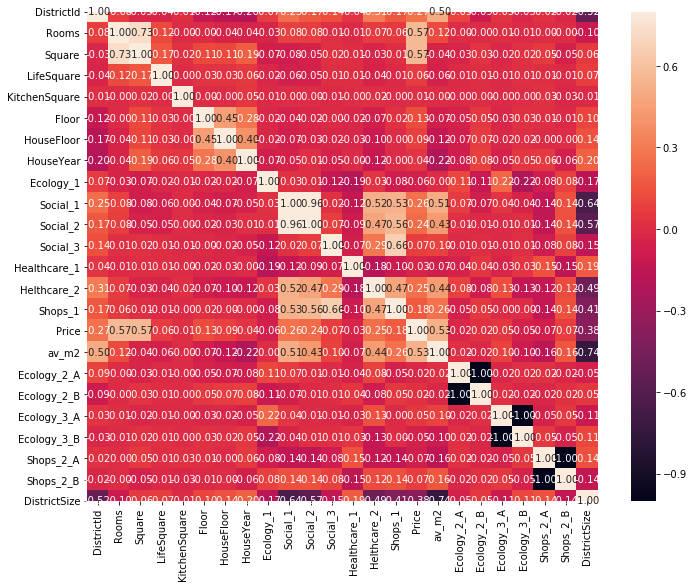

In [90]:
#отбираем фичи для построения модели
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot=True, fmt=' .2f', square=True);

In [91]:
target_name = ['Price']
feature_names = [
             'DistrictId',
             'Rooms',
             'Square',
             'LifeSquare',
             'KitchenSquare',
             'Floor',
             'HouseFloor',
             'HouseYear',
             'Ecology_1',
            #'Ecology_2',
            #'Ecology_3',
             'Social_1',
             'Social_2',
             'Social_3',
             'Healthcare_1',
             'Helthcare_2',
             'Shops_1',
            #'Shops_2',
             'Ecology_2_A',
             'Ecology_2_B',
             'Ecology_3_A',
             'Ecology_3_B',
             'Shops_2_A',
             'Shops_2_B',
             'av_m2',
             'DistrictSize',

]

In [92]:
X = df[feature_names]
y = df[target_name]


X_test = test_df[feature_names]

## Построение модели

In [93]:
forest = RandomForestRegressor(max_depth=19, 
                               max_features=6, 
                               n_estimators=400,
                               random_state=42)

In [94]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
cv_score = cross_val_score(forest, X, y, scoring='r2', cv=kf, n_jobs = -1)
print('R2: {:.5f}'.format(cv_score.mean()))

R2: 0.75935


In [95]:
#Сделал дополнительно анализ фич, которые использовали модели


In [96]:
forest.fit(X, y.values.ravel())

y_pred = forest.predict(X_test)
preds = pd.DataFrame()
preds['Id'] = X_test.index
preds['Price'] = y_pred

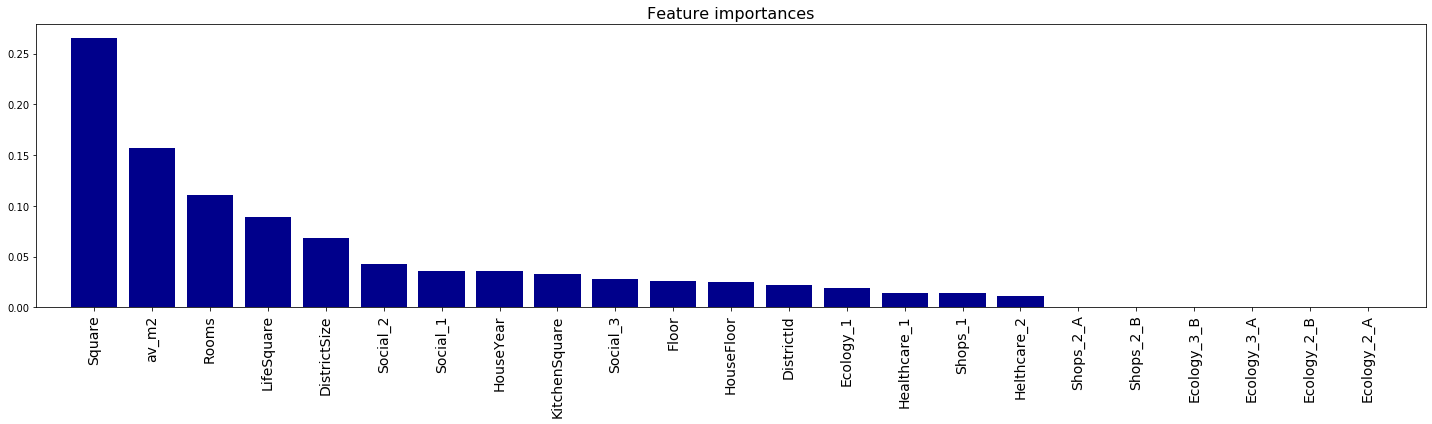

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline


def plot_f_importances(importances, X):    
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize = (20, 6))
    plt.title("Feature importances", fontsize=16)
    plt.bar(range(X.shape[1]), importances[indices] / importances.sum(),
           color="darkblue", align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation = 90, fontsize=14)
    plt.xlim([-1, X.shape[1]])

    plt.tight_layout()

    plt.show()
    
plot_f_importances(importances = forest.feature_importances_, X=X)

In [98]:
preds.to_csv('submission.csv', index=False)

In [558]:
preds

,Id,Price
0,725,155629.770782
1,15856,217341.579956
2,5480,298359.886499
3,15664,325084.666991
4,14275,145215.855144
...,...,...
4995,8180,244778.409669
4996,4695,126884.716890
4997,5783,331384.182376
4998,4780,195366.398867


Модель может быть улучшена за счет более глбокого анализа фич Rooms, Healthcare_1, LifeSquare.